# Download data from Kaggle

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bindubhargavachintam","key":"a9e63e935092925d10aa9244afc6a748"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

  0% 0.00/1.05M [00:00<?, ?B/s]
100% 1.05M/1.05M [00:00<00:00, 82.2MB/s]


# Extract data and install packages (regardless of data acquisition method)

In [7]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
  inflating: prompts_test.csv        
  inflating: prompts_train.csv       
  inflating: sample_submission.csv   
  inflating: summaries_test.csv      
  inflating: summaries_train.csv     


### **Install required packages**

In [8]:
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install textstat
!pip install nltk
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm
### END

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:00
2023-09-28 04:35:48.767385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 04:35:49.966194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [9]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
import nltk
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

###

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [10]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

### Importing Datasets

In [11]:
### Reading Datasets

summaries_train_df = pd.read_csv('summaries_train.csv')
prompts_train_df = pd.read_csv('prompts_train.csv')

In [12]:
### Display Summaries Train Dataset
summaries_train_df.head(5)

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0020ae56ffbf    ebad26  They would rub it up with soda to make the sme...   
2  004e978e639e    3b9047  In Egypt, there were many occupations and soci...   
3  005ab0199905    3b9047  The highest class was Pharaohs these people we...   
4  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   

    content   wording  
0  0.205683  0.380538  
1 -0.548304  0.506755  
2  3.128928  4.231226  
3 -0.210614 -0.471415  
4  3.272894  3.219757

In [13]:
summaries_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  7165 non-null   object 
 1   prompt_id   7165 non-null   object 
 2   text        7165 non-null   object 
 3   content     7165 non-null   float64
 4   wording     7165 non-null   float64
dtypes: float64(2), object(3)
memory usage: 280.0+ KB


In [14]:
### Display Prompt Train Dataset
prompts_train_df.head(5)

prompt_id                                    prompt_question  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   
1    3b9047  In complete sentences, summarize the structure...   
2    814d6b  Summarize how the Third Wave developed over su...   
3    ebad26  Summarize the various ways the factory would u...   

                prompt_title  \
0                 On Tragedy   
1  Egyptian Social Structure   
2             The Third Wave   
3    Excerpt from The Jungle   

                                         prompt_text  
0  Chapter 13 \r\nAs the sequel to what has alrea...  
1  Egyptian society was structured like a pyramid...  
2  Background \r\nThe Third Wave experiment took ...  
3  With one member trimming beef in a cannery, an...

In [15]:
prompts_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prompt_id        4 non-null      object
 1   prompt_question  4 non-null      object
 2   prompt_title     4 non-null      object
 3   prompt_text      4 non-null      object
dtypes: object(4)
memory usage: 256.0+ bytes


In [16]:
### Joined Dataframe

joined_train_df = summaries_train_df.merge(prompts_train_df, on="prompt_id")

In [17]:
joined_train_df.head(5)

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  
0  The Third Wave  Background \r\nThe Third Wave experiment took ...  
1  The Third Wave  Background \r\nThe Third Wave experiment took ...  
2  The Third Wave  Background \r\nThe Third Wave experiment took ...  
3  The Third Wave  Background \r\nThe Third Wave experiment took ...  
4  The Third Wave  Background \r\nThe Third Wave experiment took ...

In [18]:
joined_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7165 entries, 0 to 7164
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       7165 non-null   object 
 1   prompt_id        7165 non-null   object 
 2   text             7165 non-null   object 
 3   content          7165 non-null   float64
 4   wording          7165 non-null   float64
 5   prompt_question  7165 non-null   object 
 6   prompt_title     7165 non-null   object 
 7   prompt_text      7165 non-null   object 
dtypes: float64(2), object(6)
memory usage: 503.8+ KB


## **Section 2: Features (Q2 and Q3, 25 points total)**

### Question 2: Performing Pandas Operations as Follows:

In [19]:
### Number of words in student response (text) and prompt (prompt_text)

joined_train_df['no_of_words_in_text'] = joined_train_df['text'].str.split(" ").apply(len)
joined_train_df['no_of_words_in_prompt_text'] = joined_train_df['prompt_text'].str.split(" ").apply(len)
joined_train_df['no_of_words_in_text_and_prompt_text'] = joined_train_df['text'].str.split(" ").apply(len) + joined_train_df['prompt_text'].str.split(" ").apply(len)

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  \
0                   61                         597   
1                  206                         597   
2                   60                         597   
3                   76                         597   
4                   27                         597   

   no_of_words_in_text_and_prompt_text  
0                                  658  
1                                  803  
2                                  657  
3                                  673  
4                                  624

In [20]:
### Number of distinct words in student response (text) and prompt (prompt_text)

joined_train_df['no_of_distinct_words_in_text'] = joined_train_df['text'].str.split(" ").apply(set).apply(len)
joined_train_df['no_of_distinct_words_in_prompt_text'] = joined_train_df['prompt_text'].str.split(" ").apply(set).apply(len)
joined_train_df['no_of_distinct_words_in_text_and_prompt_text'] = (joined_train_df['text'].str.split(" ") + joined_train_df['prompt_text'].str.split(" ")).apply(set).apply(len)

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  \
0                   61                         597   
1                  206                         597   
2                   60                         597   
3                   76                         597   
4                   27                         597   

   no_of_words_in_text_and_prompt_text  no_of_distinct_words_in_text  \
0                                  658                            51   
1                                  803                           139   
2                                  657                            50   
3                                  673                            59   
4                                  624                            25   

   no_of_distinct_words_in_prompt_text  \
0                                  304   
1                                  304   
2                                  304   
3                                  304   
4                                  304   

   no_of_distinct_words_in_text_and_prompt_text  
0                                           334  
1                                           396  
2                                           325  
3                                           327  
4                                           314

In [21]:
### Number of words common to student response (text) and prompt (prompt_text)

joined_train_df['no_of_common_words_in_text_and_prompt_text'] = joined_train_df.apply(lambda x: len(set(x['text'].split(" ")).intersection(set(x['prompt_text'].split(" ")))), axis=1)

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  \
0                   61                         597   
1                  206                         597   
2                   60                         597   
3                   76                         597   
4                   27                         597   

   no_of_words_in_text_and_prompt_text  no_of_distinct_words_in_text  \
0                                  658                            51   
1                                  803                           139   
2                                  657                            50   
3                                  673                            59   
4                                  624                            25   

   no_of_distinct_words_in_prompt_text  \
0                                  304   
1                                  304   
2                                  304   
3                                  304   
4                                  304   

   no_of_distinct_words_in_text_and_prompt_text  \
0                                           334   
1                                           396   
2                                           325   
3                                           327   
4                                           314   

   no_of_common_words_in_text_and_prompt_text  
0                                          21  
1                                          47  
2                                          29  
3                                          36  
4                                          15

In [22]:
### Number of words common to student response (text) and prompt_question

joined_train_df['no_of_common_words_in_text_and_prompt_question'] = joined_train_df.apply(lambda x: len(set(x['text'].split(" ")).intersection(set(x['prompt_question'].split(" ")))), axis=1)

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  \
0                   61                         597   
1                  206                         597   
2                   60                         597   
3                   76                         597   
4                   27                         597   

   no_of_words_in_text_and_prompt_text  no_of_distinct_words_in_text  \
0                                  658                            51   
1                                  803                           139   
2                                  657                            50   
3                                  673                            59   
4                                  624                            25   

   no_of_distinct_words_in_prompt_text  \
0                                  304   
1                                  304   
2                                  304   
3                                  304   
4                                  304   

   no_of_distinct_words_in_text_and_prompt_text  \
0                                           334   
1                                           396   
2                                           325   
3                                           327   
4                                           314   

   no_of_common_words_in_text_and_prompt_text  \
0                                          21   
1                                          47   
2                                          29   
3                                          36   
4                                          15   

   no_of_common_words_in_text_and_prompt_question  
0                                               5  
1                                               9  
2                                               5  
3                                               7  
4                                               5

In [23]:
### Number of words common to student response (text) and prompt_title

joined_train_df['no_of_common_words_in_text_and_prompt_title'] = joined_train_df.apply(lambda x: len(set(x['text'].split(" ")).intersection(set(x['prompt_title'].split(" ")))), axis=1)

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  \
0                   61                         597   
1                  206                         597   
2                   60                         597   
3                   76                         597   
4                   27                         597   

   no_of_words_in_text_and_prompt_text  no_of_distinct_words_in_text  \
0                                  658                            51   
1                                  803                           139   
2                                  657                            50   
3                                  673                            59   
4                                  624                            25   

   no_of_distinct_words_in_prompt_text  \
0                                  304   
1                                  304   
2                                  304   
3                                  304   
4                                  304   

   no_of_distinct_words_in_text_and_prompt_text  \
0                                           334   
1                                           396   
2                                           325   
3                                           327   
4                                           314   

   no_of_common_words_in_text_and_prompt_text  \
0                                          21   
1                                          47   
2                                          29   
3                                          36   
4                                          15   

   no_of_common_words_in_text_and_prompt_question  \
0                                               5   
1                                               9   
2                                               5   
3                                               7   
4                                               5   

   no_of_common_words_in_text_and_prompt_title  
0                                            1  
1                                            3  
2                                            1  
3                                            1  
4                                            1

### Question 3: Readability indices, counts of words from particular classes (e.g character length, part of speech, popularity)

#### Reading Ease by Flesch Algorithm

In [24]:
# Assuming df is your DataFrame
def compute_fres(text):
    return textstat.flesch_reading_ease(text)

joined_train_df['readability_score'] = joined_train_df['prompt_text'].apply(compute_fres)
joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  \
0                   61                         597   
1                  206                         597   
2                   60                         597   
3                   76                         597   
4                   27                         597   

   no_of_words_in_text_and_prompt_text  no_of_distinct_words_in_text  \
0                                  658                            51   
1                                  803                           139   
2                                  657                            50   
3                                  673                            59   
4                                  624                            25   

   no_of_distinct_words_in_prompt_text  \
0                                  304   
1                                  304   
2                                  304   
3                                  304   
4                                  304   

   no_of_distinct_words_in_text_and_prompt_text  \
0                                           334   
1                                           396   
2                                           325   
3                                           327   
4                                           314   

   no_of_common_words_in_text_and_prompt_text  \
0                                          21   
1                                          47   
2                                          29   
3                                          36   
4                                          15   

   no_of_common_words_in_text_and_prompt_question  \
0                                               5   
1                                               9   
2                                               5   
3                                               7   
4                                               5   

   no_of_common_words_in_text_and_prompt_title  readability_score  
0                                            1              56.69  
1                                            3              56.69  
2                                            1              56.69  
3                                            1              56.69  
4                                            1              56.69

#### Text, Character and Sentence Lengths

In [25]:
# Text length in terms of characters
joined_train_df['char_count'] = joined_train_df['text'].apply(len)

# Text length in terms of words
joined_train_df['word_count'] = joined_train_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Text length in terms of sentences
joined_train_df['sentence_count'] = joined_train_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Average word length
joined_train_df['avg_word_length'] = joined_train_df['char_count'] / joined_train_df['word_count']

# Average sentence length in terms of words
joined_train_df['avg_sentence_length'] = joined_train_df['word_count'] / joined_train_df['sentence_count']

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  ...  \
0                   61                         597  ...   
1                  206                         597  ...   
2                   60                         597  ...   
3                   76                         597  ...   
4                   27                         597  ...   

   no_of_distinct_words_in_text_and_prompt_text  \
0                                           334   
1                                           396   
2                                           325   
3                                           327   
4                                           314   

   no_of_common_words_in_text_and_prompt_text  \
0                                          21   
1                                          47   
2                                          29   
3                                          36   
4                                          15   

   no_of_common_words_in_text_and_prompt_question  \
0                                               5   
1                                               9   
2                                               5   
3                                               7   
4                                               5   

   no_of_common_words_in_text_and_prompt_title  readability_score  char_count  \
0                                            1              56.69         346   
1                                            3              56.69        1225   
2                                            1              56.69         345   
3                                            1              56.69         451   
4                                            1              56.69         145   

   word_count  sentence_count  avg_word_length  avg_sentence_length  
0          64               4         5.406250            16.000000  
1         232              14         5.280172            16.571429  
2          67               3         5.149254            22.333333  
3          86               3         5.244186            28.666667  
4          29               2         5.000000            14.500000  

[5 rows x 23 columns]

#### Lexical Diversity

In [26]:
# Tokenize the text
joined_train_df['tokens'] = joined_train_df['text'].apply(nltk.word_tokenize)

# Compute lexical diversity
joined_train_df['lexical_diversity'] = joined_train_df['tokens'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
joined_train_df = joined_train_df.drop(columns=['tokens'])

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  ...  \
0                   61                         597  ...   
1                  206                         597  ...   
2                   60                         597  ...   
3                   76                         597  ...   
4                   27                         597  ...   

   no_of_common_words_in_text_and_prompt_text  \
0                                          21   
1                                          47   
2                                          29   
3                                          36   
4                                          15   

   no_of_common_words_in_text_and_prompt_question  \
0                                               5   
1                                               9   
2                                               5   
3                                               7   
4                                               5   

   no_of_common_words_in_text_and_prompt_title  readability_score  char_count  \
0                                            1              56.69         346   
1                                            3              56.69        1225   
2                                            1              56.69         345   
3                                            1              56.69         451   
4                                            1              56.69         145   

   word_count  sentence_count  avg_word_length  avg_sentence_length  \
0          64               4         5.406250            16.000000   
1         232              14         5.280172            16.571429   
2          67               3         5.149254            22.333333   
3          86               3         5.244186            28.666667   
4          29               2         5.000000            14.500000   

   lexical_diversity  
0           0.812500  
1           0.590517  
2           0.791045  
3           0.697674  
4           0.896552  

[5 rows x 24 columns]

#### Sentiment Polarity & Sentiment Label

In [27]:
import pandas as pd
from textblob import TextBlob

# Compute sentiment polarity
joined_train_df['sentiment_polarity'] = joined_train_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Labeling based on polarity
joined_train_df['sentiment_label'] = joined_train_df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  ...  \
0                   61                         597  ...   
1                  206                         597  ...   
2                   60                         597  ...   
3                   76                         597  ...   
4                   27                         597  ...   

   no_of_common_words_in_text_and_prompt_title  readability_score  char_count  \
0                                            1              56.69         346   
1                                            3              56.69        1225   
2                                            1              56.69         345   
3                                            1              56.69         451   
4                                            1              56.69         145   

   word_count  sentence_count  avg_word_length  avg_sentence_length  \
0          64               4         5.406250            16.000000   
1         232              14         5.280172            16.571429   
2          67               3         5.149254            22.333333   
3          86               3         5.244186            28.666667   
4          29               2         5.000000            14.500000   

   lexical_diversity  sentiment_polarity  sentiment_label  
0           0.812500            0.170455         positive  
1           0.590517            0.048203         positive  
2           0.791045            0.075000         positive  
3           0.697674           -0.666667         negative  
4           0.896552            0.088939         positive  

[5 rows x 26 columns]

#### Count Named Entities - NER Count

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Count named entities in the text
def count_named_entities(text):
    doc = nlp(text)
    return len(doc.ents)

joined_train_df['ner_count'] = joined_train_df['text'].apply(count_named_entities)
joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  ...  readability_score  \
0                   61                         597  ...              56.69   
1                  206                         597  ...              56.69   
2                   60                         597  ...              56.69   
3                   76                         597  ...              56.69   
4                   27                         597  ...              56.69   

   char_count  word_count  sentence_count  avg_word_length  \
0         346          64               4         5.406250   
1        1225         232              14         5.280172   
2         345          67               3         5.149254   
3         451          86               3         5.244186   
4         145          29               2         5.000000   

   avg_sentence_length  lexical_diversity  sentiment_polarity  \
0            16.000000           0.812500            0.170455   
1            16.571429           0.590517            0.048203   
2            22.333333           0.791045            0.075000   
3            28.666667           0.697674           -0.666667   
4            14.500000           0.896552            0.088939   

   sentiment_label  ner_count  
0         positive          2  
1         positive         16  
2         positive          3  
3         negative          3  
4         positive          1  

[5 rows x 27 columns]

#### Cosine Simalarity

In [29]:
# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Concatenate 'text' and 'prompt_text' columns for vectorization
all_texts = joined_train_df['text'].tolist() + joined_train_df['prompt_text'].tolist()

# Generate the TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Split the matrix into two for 'text' and 'prompt_text' vectors
text_tfidf, prompt_tfidf = tfidf_matrix[:len(joined_train_df)], tfidf_matrix[len(joined_train_df):]

# Compute cosine similarity
joined_train_df['cosine_similarity'] = [cosine_similarity(text_tfidf[i], prompt_tfidf[i])[0][0] for i in range(len(joined_train_df))]

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  ...  char_count  \
0                   61                         597  ...         346   
1                  206                         597  ...        1225   
2                   60                         597  ...         345   
3                   76                         597  ...         451   
4                   27                         597  ...         145   

   word_count  sentence_count  avg_word_length  avg_sentence_length  \
0          64               4         5.406250            16.000000   
1         232              14         5.280172            16.571429   
2          67               3         5.149254            22.333333   
3          86               3         5.244186            28.666667   
4          29               2         5.000000            14.500000   

   lexical_diversity  sentiment_polarity  sentiment_label  ner_count  \
0           0.812500            0.170455         positive          2   
1           0.590517            0.048203         positive         16   
2           0.791045            0.075000         positive          3   
3           0.697674           -0.666667         negative          3   
4           0.896552            0.088939         positive          1   

   cosine_similarity  
0           0.182623  
1           0.405863  
2           0.323222  
3           0.403937  
4           0.183623  

[5 rows x 28 columns]

#### Count Nouns, adjectives & verbs

In [30]:
import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def pos_counts(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    return pos_tags.count('NOUN'), pos_tags.count('VERB'), pos_tags.count('ADJ')

joined_train_df['num_nouns'], joined_train_df['num_verbs'], joined_train_df['num_adjectives'] = zip(*joined_train_df['text'].apply(pos_counts))

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  ...  avg_word_length  \
0                   61                         597  ...         5.406250   
1                  206                         597  ...         5.280172   
2                   60                         597  ...         5.149254   
3                   76                         597  ...         5.244186   
4                   27                         597  ...         5.000000   

   avg_sentence_length  lexical_diversity  sentiment_polarity  \
0            16.000000           0.812500            0.170455   
1            16.571429           0.590517            0.048203   
2            22.333333           0.791045            0.075000   
3            28.666667           0.697674           -0.666667   
4            14.500000           0.896552            0.088939   

   sentiment_label  ner_count  cosine_similarity  num_nouns  num_verbs  \
0         positive          2           0.182623         14         14   
1         positive         16           0.405863         42         25   
2         positive          3           0.323222         12          9   
3         negative          3           0.403937         13         10   
4         positive          1           0.183623          4          4   

   num_adjectives  
0               6  
1               8  
2               2  
3               6  
4               3  

[5 rows x 31 columns]

### Count of Stop words

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to count stopwords.
def count_stopwords(text):
    doc = nlp(text)
    return sum([token.is_stop for token in doc])

joined_train_df['stopword_count'] = joined_train_df['text'].apply(count_stopwords)

joined_train_df.head()

student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   
2  0095993991fe    814d6b  The third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  The experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  The third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  Summarize how the Third Wave developed over su...   
1  3.272894  3.219757  Summarize how the Third Wave developed over su...   
2  0.205683  0.380538  Summarize how the Third Wave developed over su...   
3  0.567975  0.969062  Summarize how the Third Wave developed over su...   
4 -0.910596 -0.081769  Summarize how the Third Wave developed over su...   

     prompt_title                                        prompt_text  \
0  The Third Wave  Background \r\nThe Third Wave experiment took ...   
1  The Third Wave  Background \r\nThe Third Wave experiment took ...   
2  The Third Wave  Background \r\nThe Third Wave experiment took ...   
3  The Third Wave  Background \r\nThe Third Wave experiment took ...   
4  The Third Wave  Background \r\nThe Third Wave experiment took ...   

   no_of_words_in_text  no_of_words_in_prompt_text  ...  avg_sentence_length  \
0                   61                         597  ...            16.000000   
1                  206                         597  ...            16.571429   
2                   60                         597  ...            22.333333   
3                   76                         597  ...            28.666667   
4                   27                         597  ...            14.500000   

   lexical_diversity  sentiment_polarity  sentiment_label  ner_count  \
0           0.812500            0.170455         positive          2   
1           0.590517            0.048203         positive         16   
2           0.791045            0.075000         positive          3   
3           0.697674           -0.666667         negative          3   
4           0.896552            0.088939         positive          1   

   cosine_similarity  num_nouns  num_verbs  num_adjectives  stopword_count  
0           0.182623         14         14               6              30  
1           0.405863         42         25               8             114  
2           0.323222         12          9               2              35  
3           0.403937         13         10               6              44  
4           0.183623          4          4               3              14  

[5 rows x 32 columns]


## **Section 3: Content and Wording (Q4, 10 points)**

#### 1. Visualize the distributions as histograms.

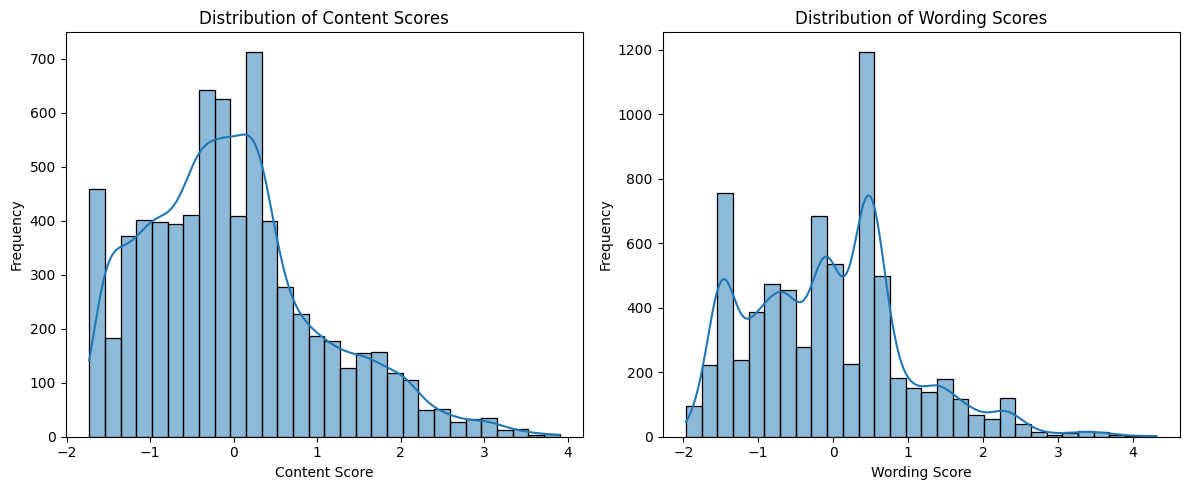

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(joined_train_df['content'], bins=30, kde=True)
plt.title('Distribution of Content Scores')
plt.xlabel('Content Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(joined_train_df['wording'], bins=30, kde=True)
plt.title('Distribution of Wording Scores')
plt.xlabel('Wording Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 2. Plot a scatterplot.

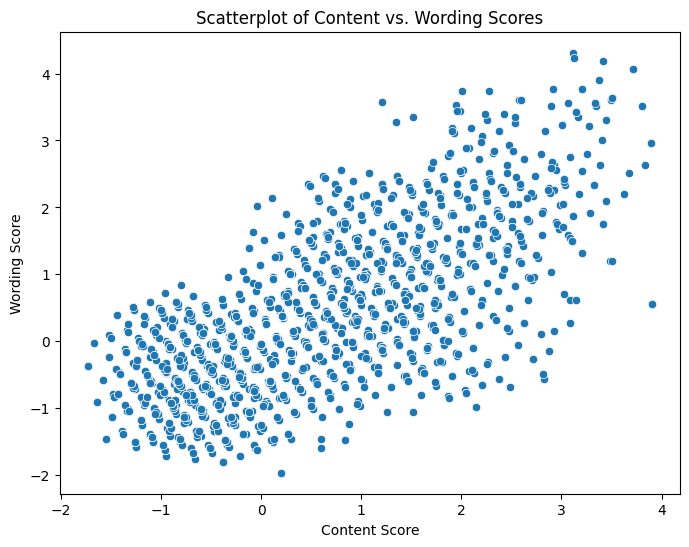

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=joined_train_df['content'], y=joined_train_df['wording'])
plt.title('Scatterplot of Content vs. Wording Scores')
plt.xlabel('Content Score')
plt.ylabel('Wording Score')
plt.show()

#### 3. Compute correlation metrics.

In [34]:
correlation = joined_train_df['content'].corr(joined_train_df['wording'])
print(f"Correlation between 'content' and 'wording': {correlation:.2f}")

Correlation between 'content' and 'wording': 0.75


#### Heat Map - Correlation among features

<Axes: >

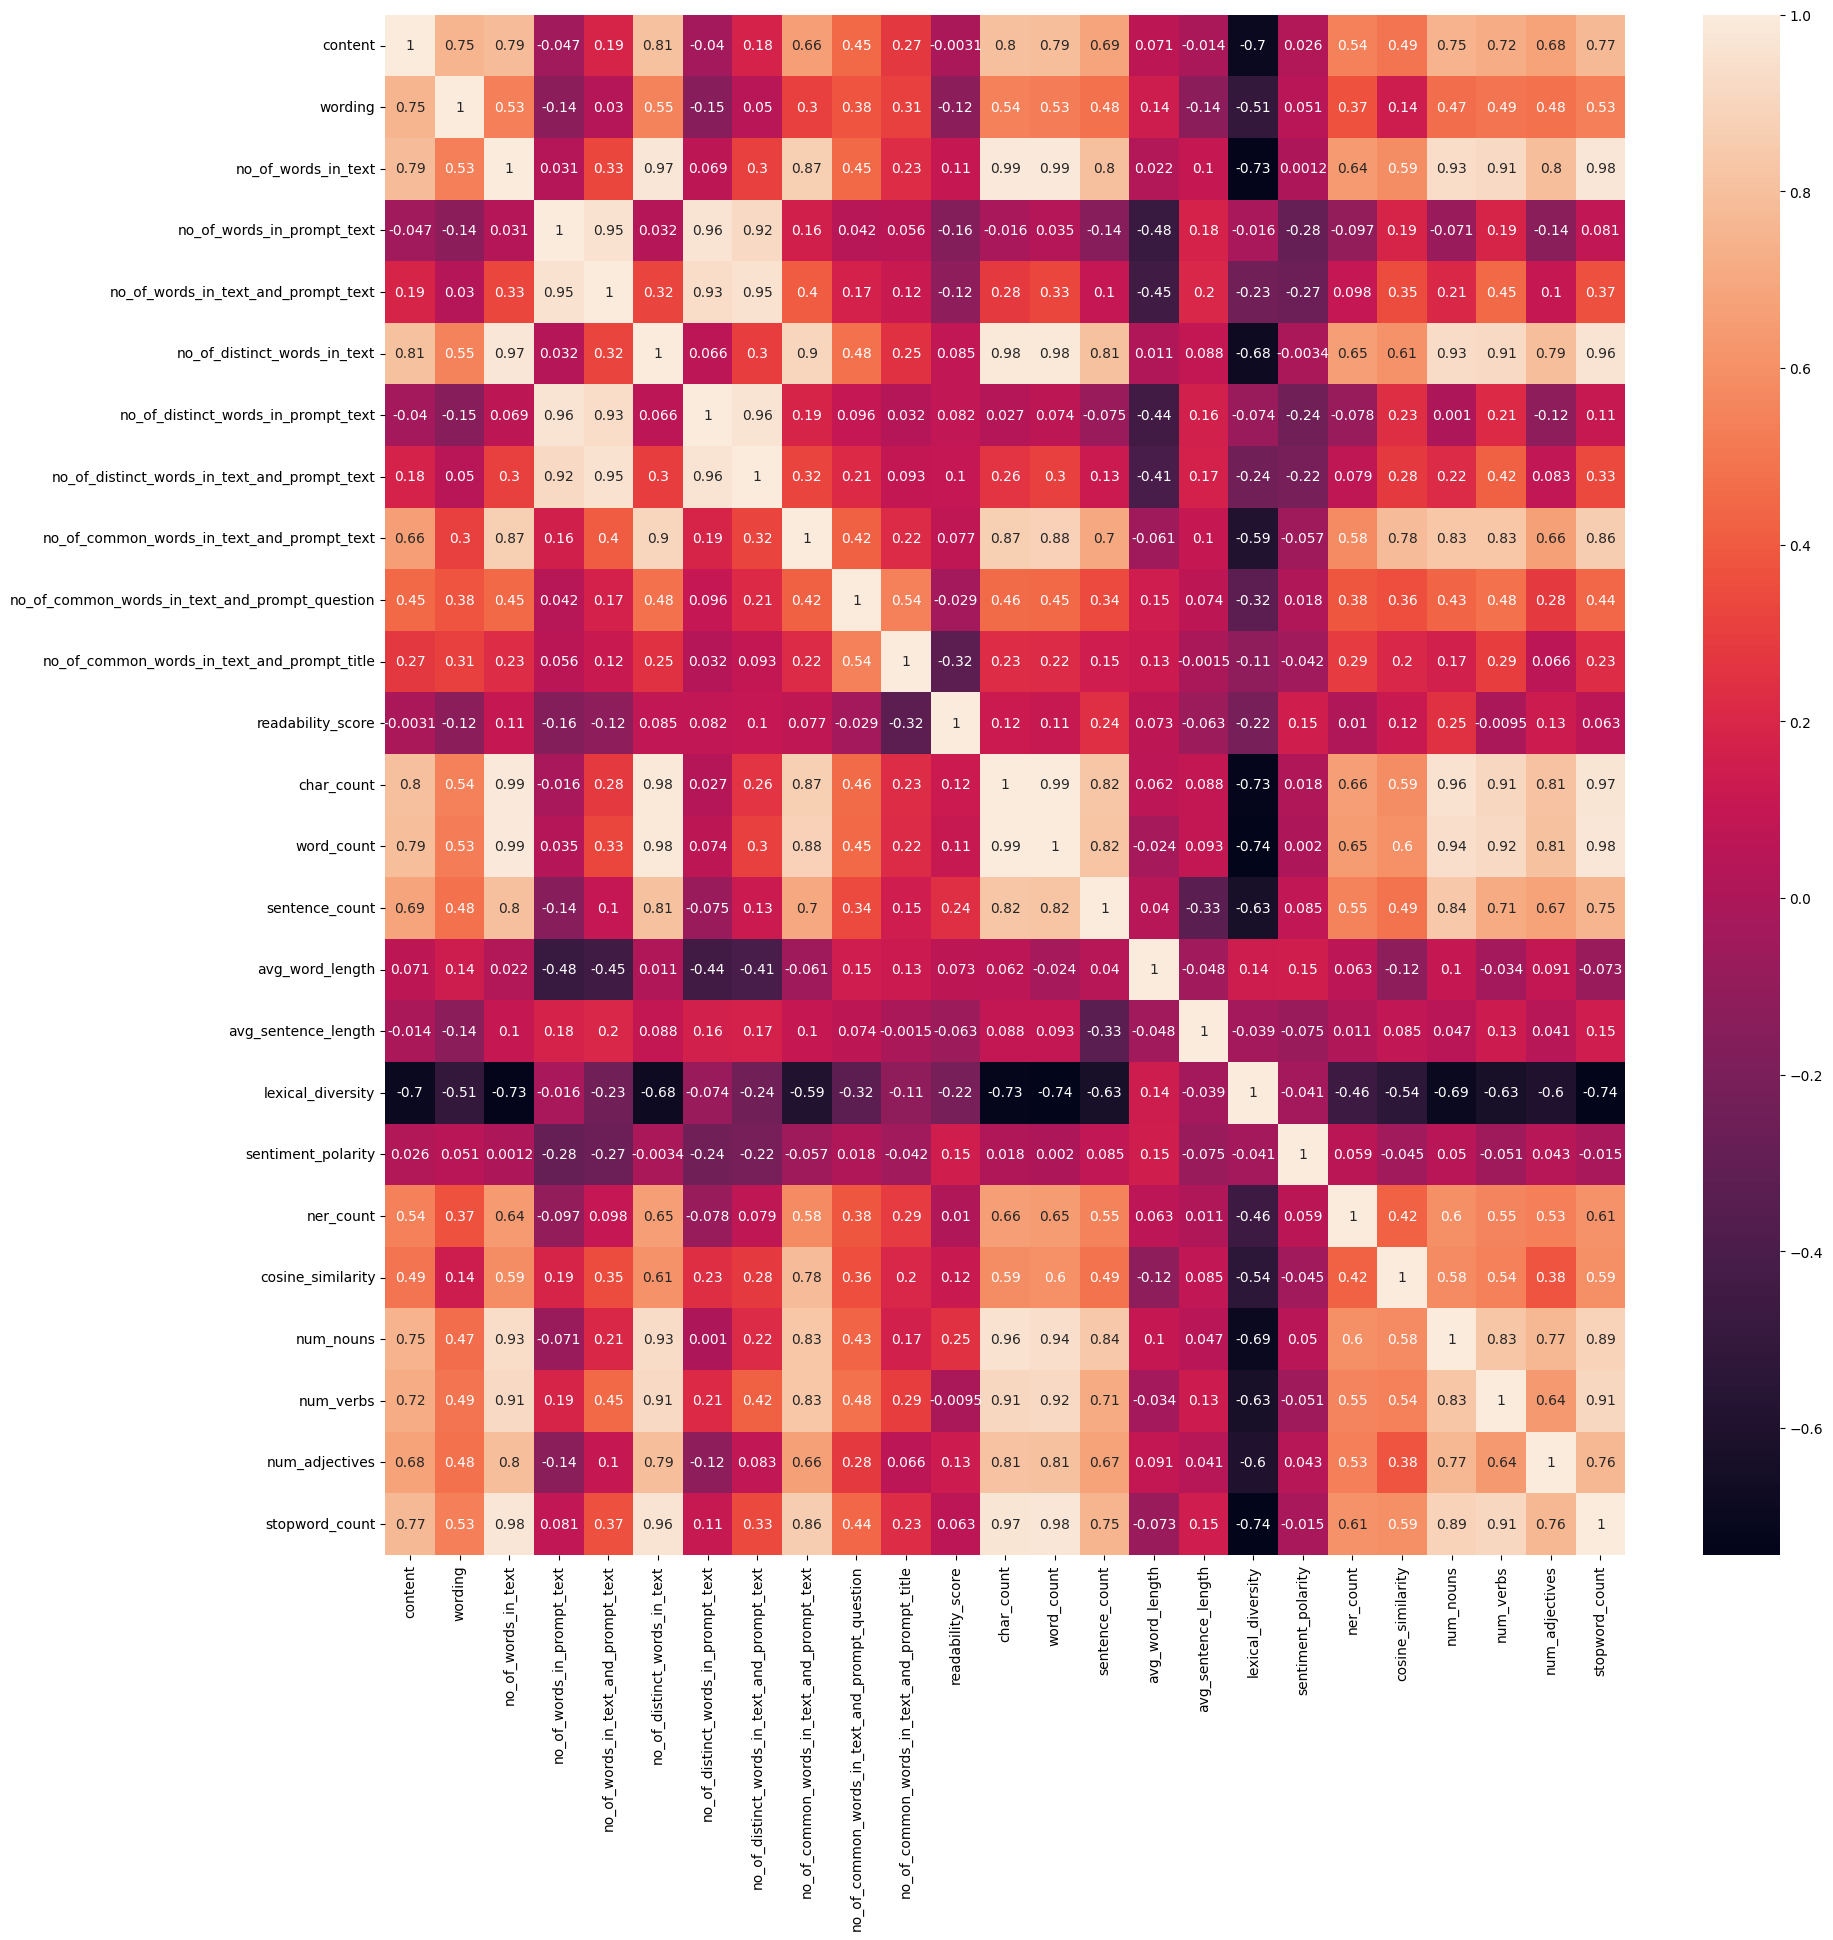

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(joined_train_df.corr(numeric_only=True), annot=True)

#### Distribution shapes for different prompts

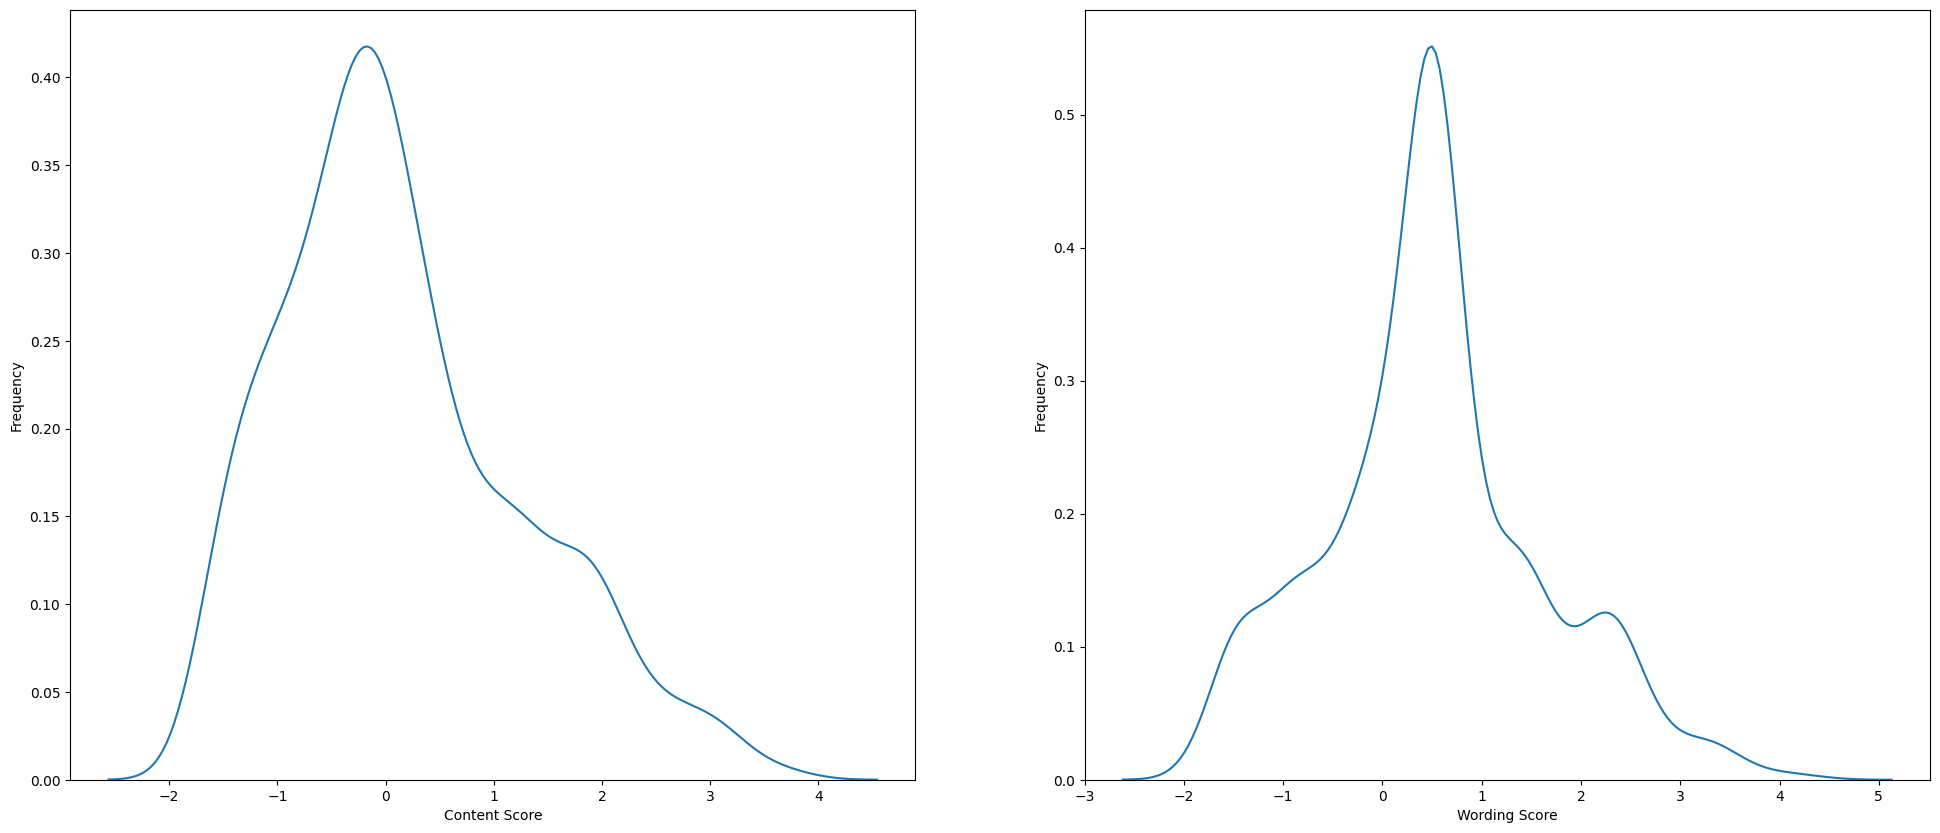

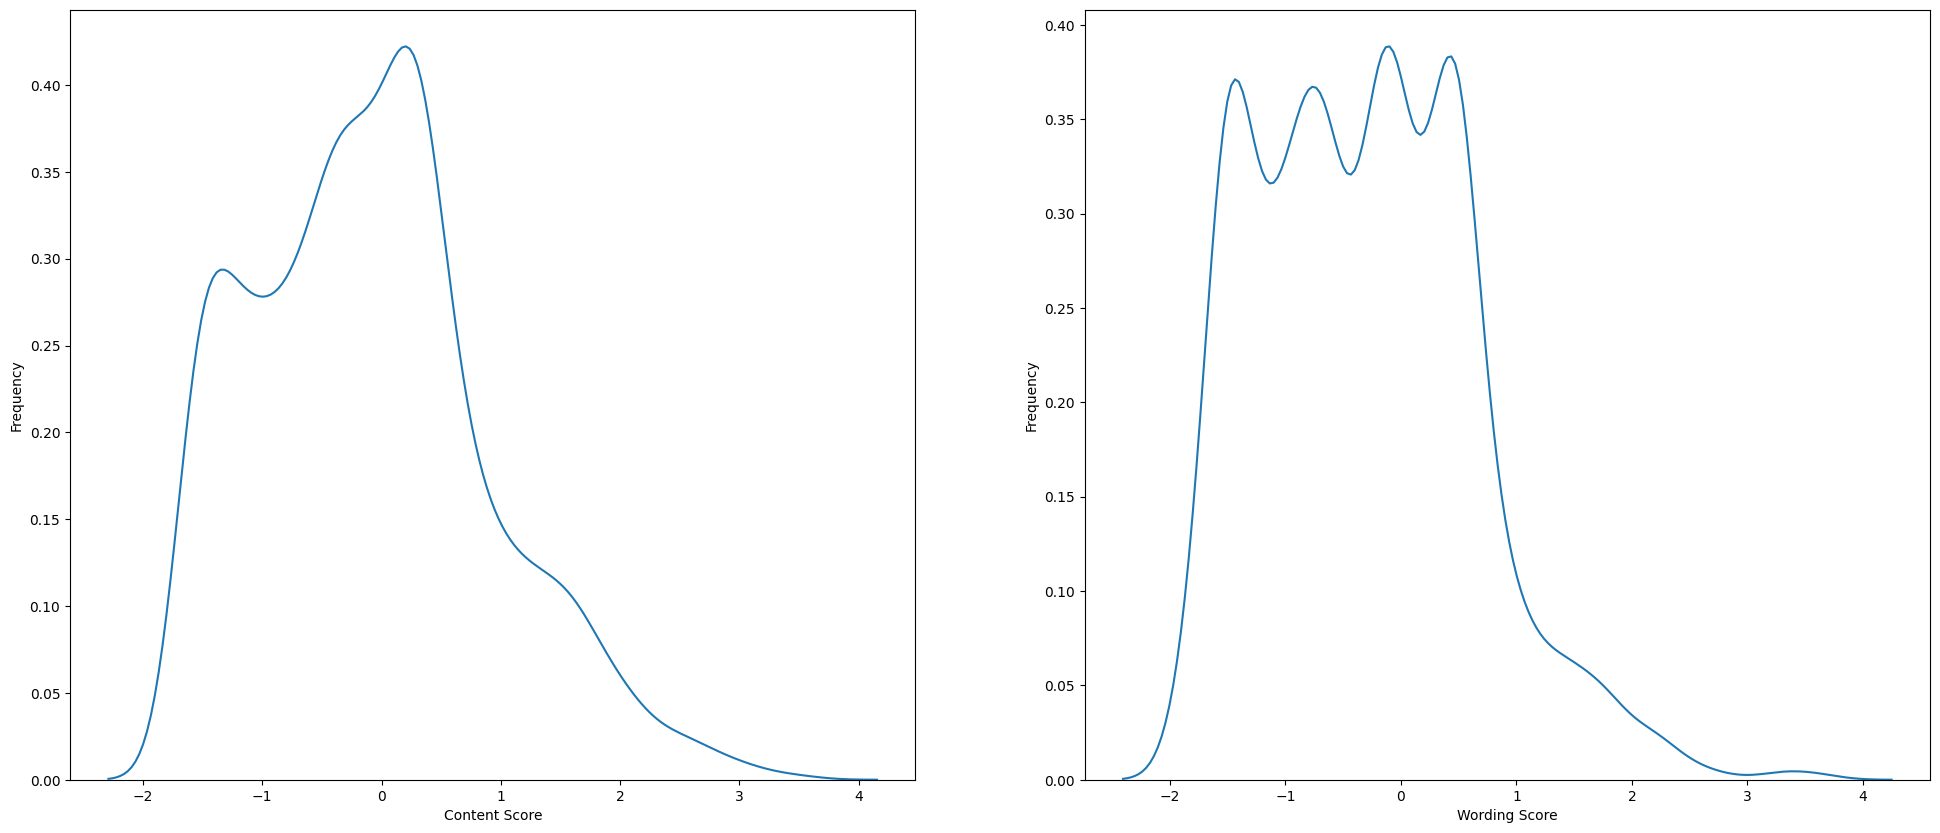

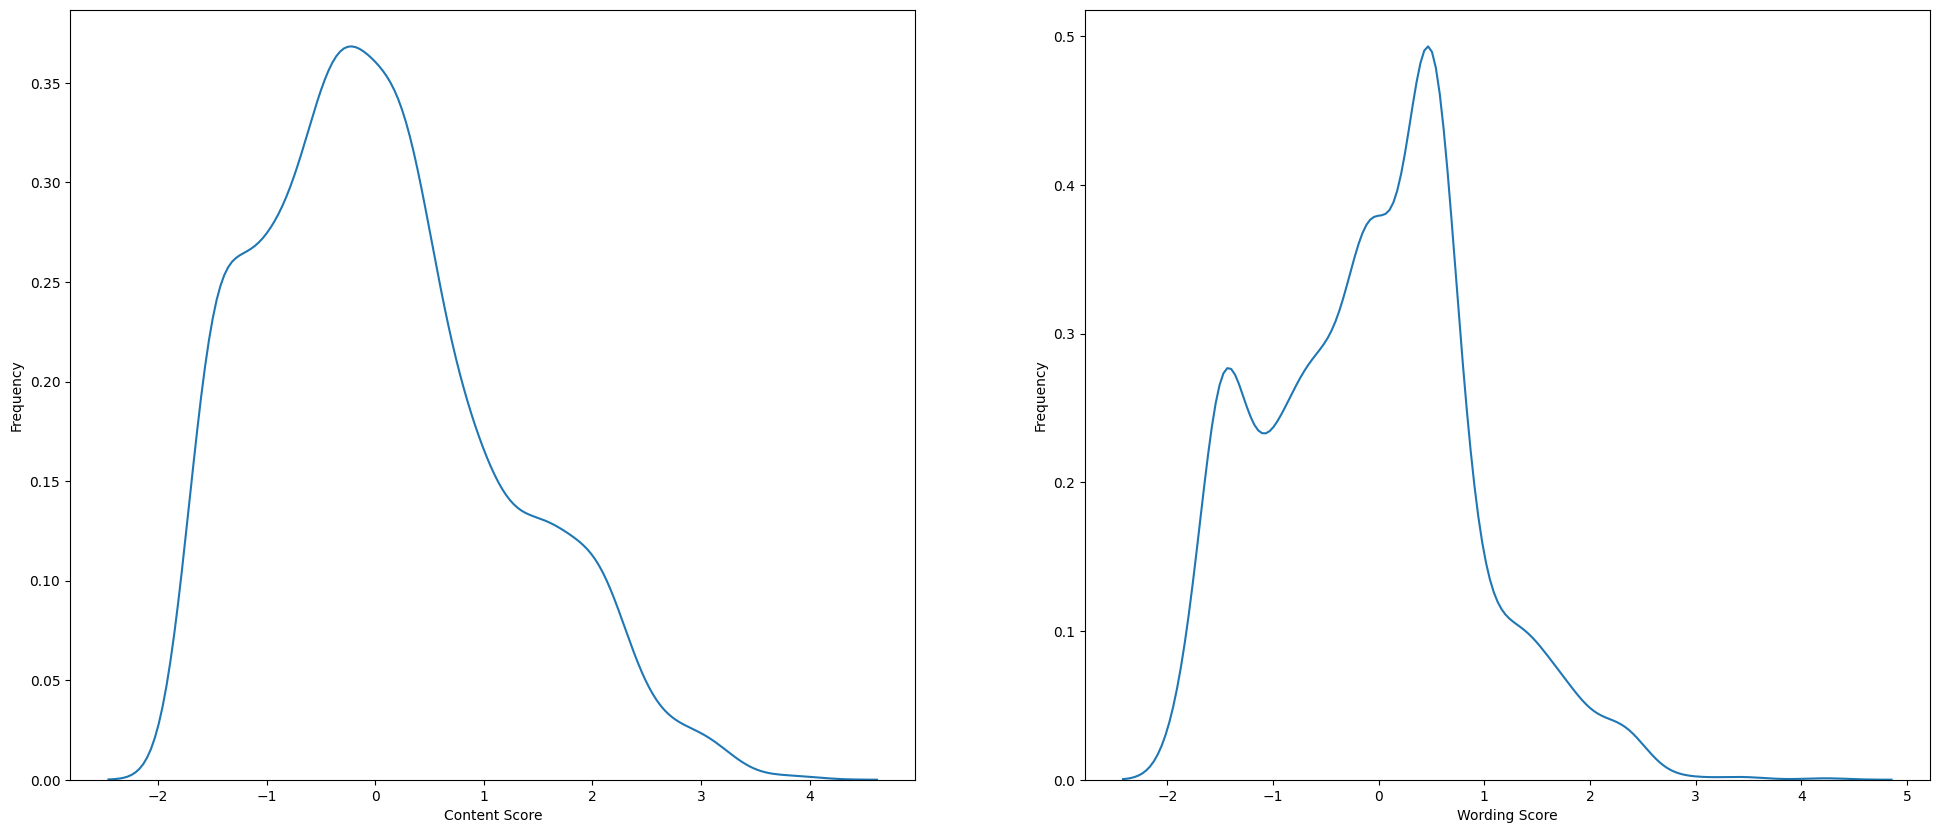

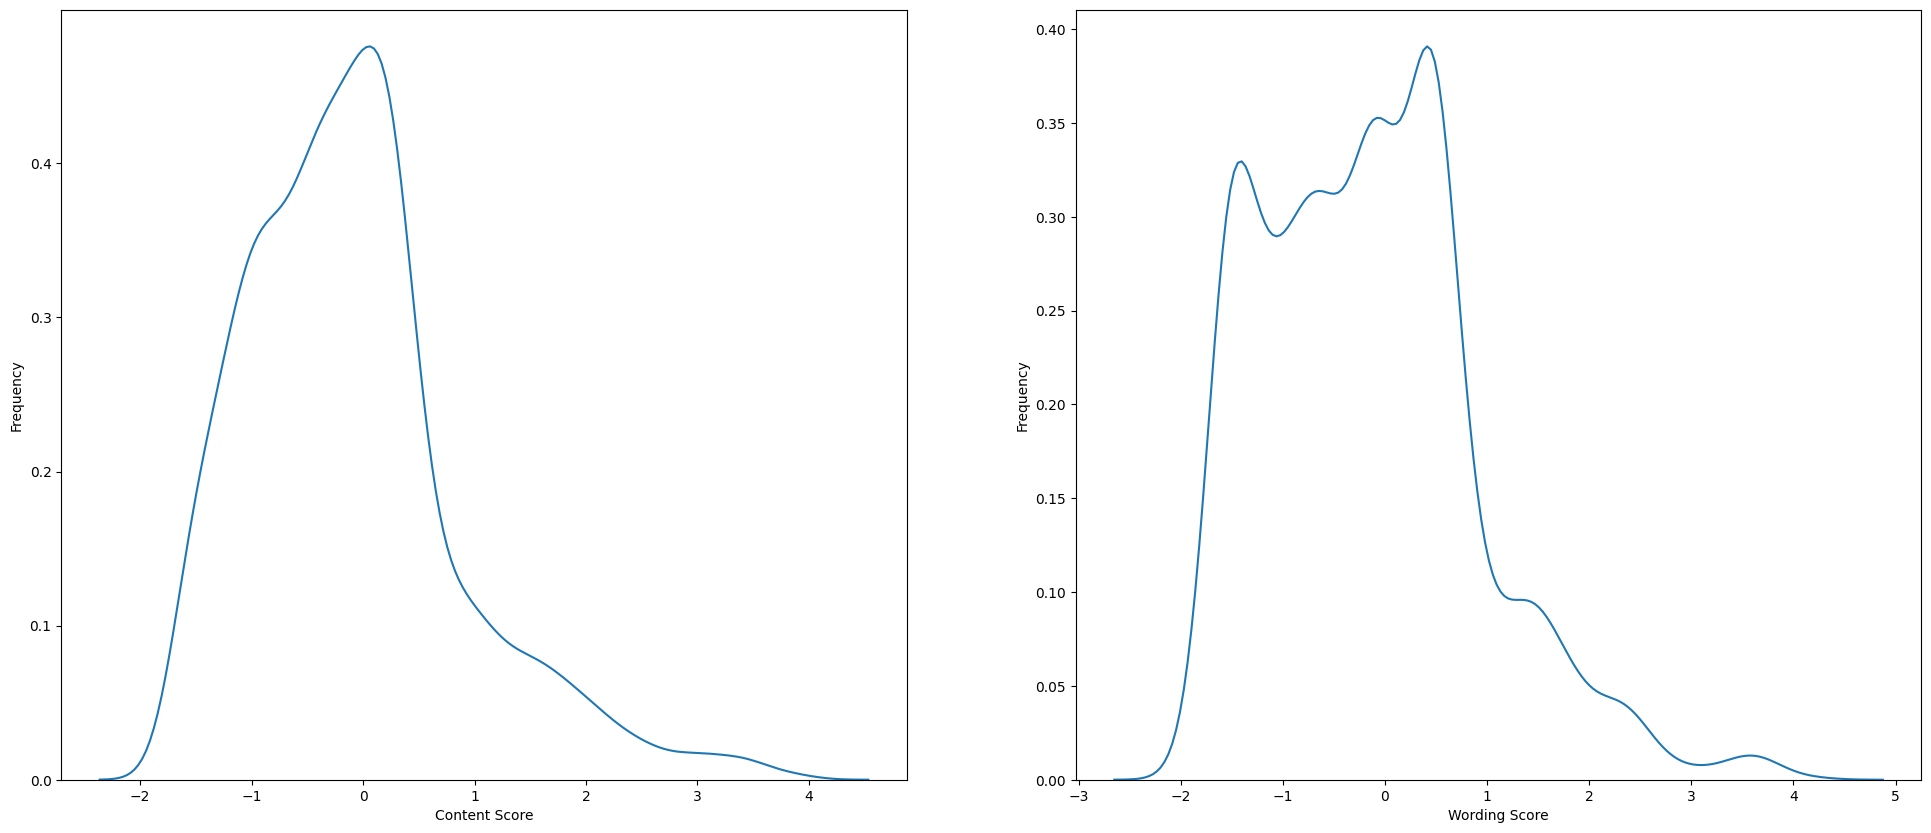

In [36]:
# Check the distribution shapes for different prompts
prompts = joined_train_df['prompt_text'].unique()
for prompt in prompts:
    subset = joined_train_df[joined_train_df['prompt_text'] == prompt]

    plt.figure(figsize=(24, 10))

    plt.subplot(1, 2, 1)
    sns.kdeplot(subset['content'])
    plt.xlabel('Content Score')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.kdeplot(subset['wording'])
    plt.xlabel('Wording Score')
    plt.ylabel('Frequency')

    # plt.tight_layout()
    plt.show()

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

**Calculate Term Frequencies:**
For each corpus (good and bad), calculate the frequency of each word.

A positive log odds ratio means the word is over-represented in good essays, while a negative value means it's over-represented in bad essays. The addition of 1 in the formula is a simple form of Laplace smoothing to handle words that might not appear in one of the corpora.

In [37]:
# Define thresholds
content_threshold = joined_train_df['content'].median()  # example threshold
wording_threshold = joined_train_df['wording'].median()  # example threshold

# Separate essays into two corpora
good_essays = joined_train_df[(joined_train_df['content'] > content_threshold) & (joined_train_df['wording'] > wording_threshold)]['text'].str.cat(sep=' ').split()
bad_essays = joined_train_df[(joined_train_df['content'] <= content_threshold) & (joined_train_df['wording'] <= wording_threshold)]['text'].str.cat(sep=' ').split()

# Calculate word frequencies
good_word_freq = Counter(good_essays)
bad_word_freq = Counter(bad_essays)

# Calculate log odds ratio
all_words = set(good_word_freq) | set(bad_word_freq)
log_odds_ratio = {}

for word in all_words:
    log_odds_ratio[word] = np.log((good_word_freq[word] + 1) / (bad_word_freq[word] + 1))

# Sort words by log odds ratio
sorted_words = sorted(log_odds_ratio.items(), key=lambda x: x[1], reverse=True)

# Print top and bottom words
print("Words over-represented in good essays:", sorted_words[:10])
print("Words over-represented in bad essays:", sorted_words[-10:])

Words over-represented in good essays: [('However,', 3.7376696182833684), ('join.', 3.5553480614894135), ('method', 3.4965075614664802), ('creating', 3.4657359027997265), ('members.', 3.4339872044851463), ('Next,', 3.4339872044851463), ('scribes.', 3.4011973816621555), ('Next', 3.3250360206965914), ('control,', 3.2188758248682006), ('mentions', 3.1780538303479458)]
Words over-represented in bad essays: [('seasonings', -1.791759469228055), ('swindles.', -1.791759469228055), ('pitty', -1.791759469228055), ('mother', -1.9459101490553135), ('copy', -1.9459101490553135), ('white—it', -2.1972245773362196), ('Craftspersons', -2.1972245773362196), ('lucrative.', -2.1972245773362196), ('u', -2.3025850929940455), ('glycerine,', -2.4849066497880004)]


**To identify disproportionately common words in bad essays:**

Using the previously calculated log_odds_ratio, sort the words in ascending order. This will place words that are more common in bad essays at the beginning of the sorted list.

In [38]:
# Sort words by log odds ratio in ascending order
sorted_words_bad = sorted(log_odds_ratio.items(), key=lambda x: x[1])

# Print top words that are over-represented in bad essays
print("Words over-represented in bad essays:", sorted_words_bad[:10])

Words over-represented in bad essays: [('glycerine,', -2.4849066497880004), ('u', -2.3025850929940455), ('white—it', -2.1972245773362196), ('Craftspersons', -2.1972245773362196), ('lucrative.', -2.1972245773362196), ('mother', -1.9459101490553135), ('copy', -1.9459101490553135), ('acid,', -1.791759469228055), ('jest—that', -1.791759469228055), ('seasonings', -1.791759469228055)]


The output will give you the top 10 words that are disproportionately represented in bad essays.

**Statistical Interpretation:**
The Log Odds Ratio is an appropriate statistic to use in this context. It provides a measure of the relative difference in the appearance of a term in two corpora, adjusted for the overall size of the corpora. By examining negative values of the Log Odds Ratio, we can understand which words are more characteristic of bad essays in comparison to good ones.

## **Section 5: Three Interesting Plots (Q6, 15 points)**

#### Histogram for Content scores

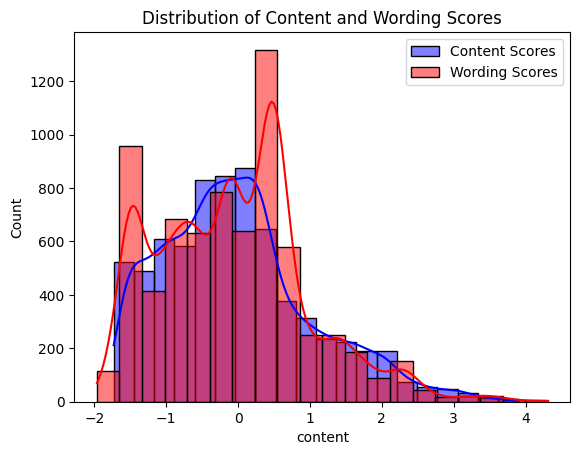

In [39]:
# Histogram for content scores
sns.histplot(data=joined_train_df, x="content", kde=True, bins=20, color='blue', label='Content Scores')
sns.histplot(data=joined_train_df, x="wording", kde=True, bins=20, color='red', label='Wording Scores')
plt.legend()
plt.title('Distribution of Content and Wording Scores')
plt.show()

**Insight:** This will help you understand the overall distribution of scores. For instance, if you see that most essays have high content but low wording scores, it might indicate that while the substance of the essays is good, their presentation or language might be lacking.

#### Cosine Similary vs Counting & wording

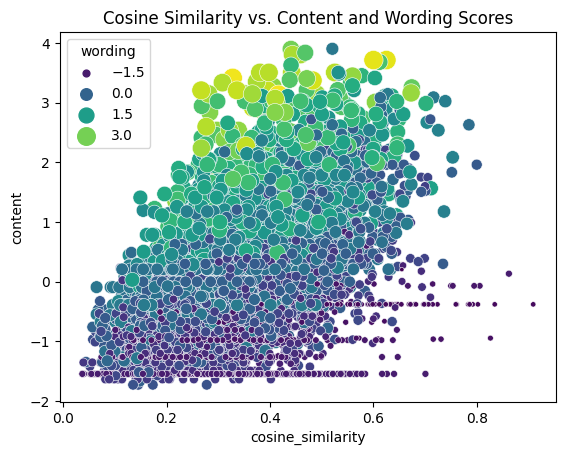

In [40]:
# Assuming you have a 'cosine_similarity' column in your dataframe
sns.scatterplot(data=joined_train_df, x="cosine_similarity", y="content", hue="wording", palette="viridis", size="wording", sizes=(10, 200))
plt.title('Cosine Similarity vs. Content and Wording Scores')
plt.show()

**Insight:** If essays with higher similarity to the prompt tend to have higher scores, it might indicate that sticking closely to the prompt is beneficial. Conversely, if there's no clear pattern, it might show that originality is neither penalized nor rewarded.

#### Avg. Word Length vs Content & Wording

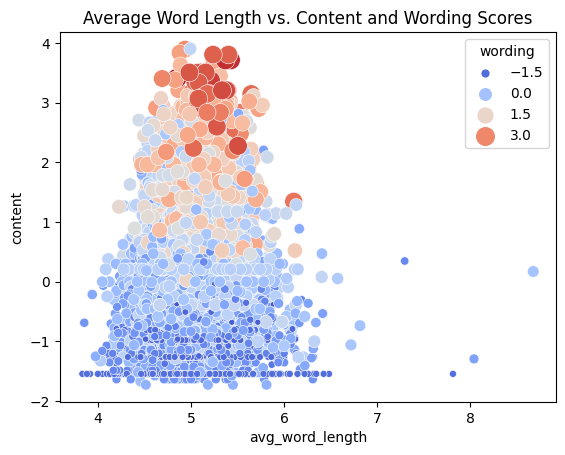

In [41]:
# Assuming you computed an 'avg_word_length' column
sns.scatterplot(data=joined_train_df, x="avg_word_length", y="content", hue="wording", palette="coolwarm", size="wording", sizes=(10, 200))
plt.title('Average Word Length vs. Content and Wording Scores')
plt.show()

**Insight:** If essays with longer average word lengths have higher scores, it might suggest that richer vocabulary or more complex language is rewarded.

#### Stopwords vs content & wording (split)

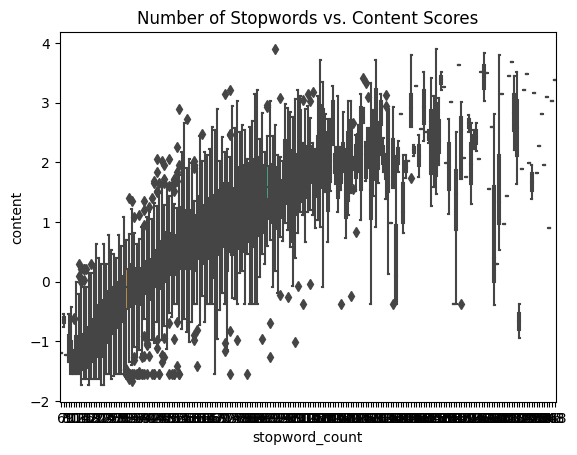

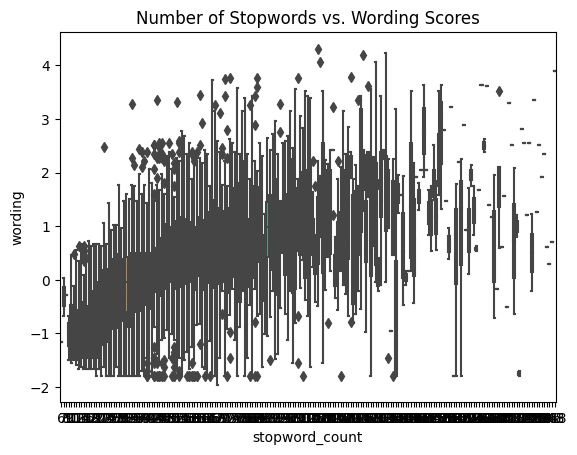

In [42]:
# Assuming you have a 'num_stopwords' column in your dataframe
sns.boxplot(data=joined_train_df, x="stopword_count", y="content")
plt.title('Number of Stopwords vs. Content Scores')
plt.show()

sns.boxplot(data=joined_train_df, x="stopword_count", y="wording")
plt.title('Number of Stopwords vs. Wording Scores')
plt.show()

**Insight:** If essays with fewer stopwords tend to have higher scores, it may indicate that concise and direct language is preferred.

#### Distribution of Parts of Speech in Essays

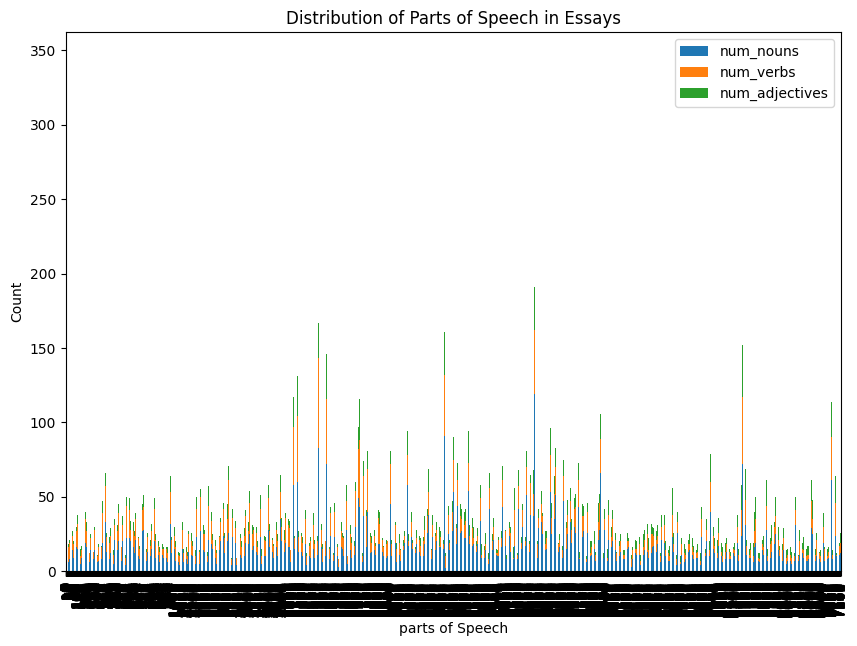

In [43]:
joined_train_df[['num_nouns', 'num_verbs', 'num_adjectives']].plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Distribution of Parts of Speech in Essays')
plt.ylabel('Count')
plt.xlabel('parts of Speech')
plt.show()

**Insight:** Observing which parts of speech dominate can give insights into the nature of the essays. For instance, essays with many adjectives might be more descriptive, while those with more verbs might be more action-oriented or narrative in style.

#### WORD CLOUD

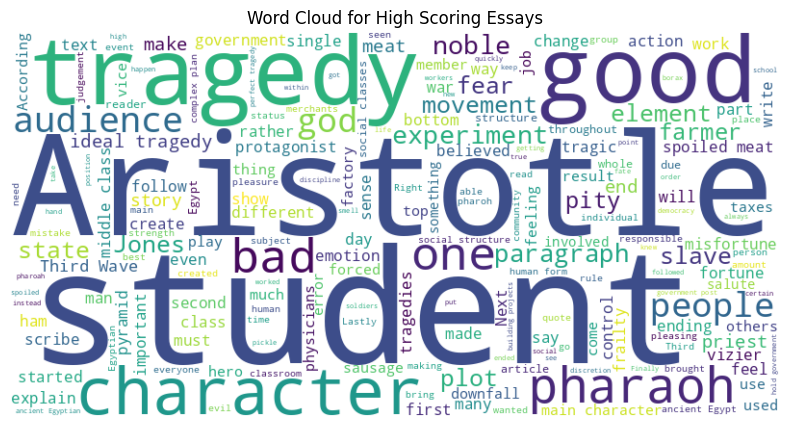

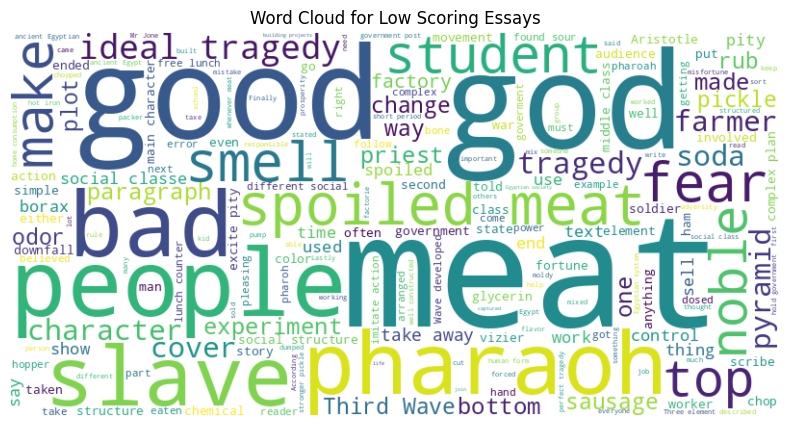

In [44]:
# Define high-scoring and low-scoring essays
threshold = 3  # You can define this based on your understanding of the scoring system
high_scoring_essays = joined_train_df[joined_train_df['content'] > threshold]['text'].str.cat(sep=' ')
low_scoring_essays = joined_train_df[joined_train_df['content'] <= threshold]['text'].str.cat(sep=' ')

# Generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(high_scoring_essays, 'Word Cloud for High Scoring Essays')
print("\n\n\n")
generate_wordcloud(low_scoring_essays, 'Word Cloud for Low Scoring Essays')

**Insight:** From the word clouds, you might observe certain terms or phrases that are prominent in high-scoring essays and absent in low-scoring ones (or vice versa). This can provide a qualitative sense of what content is characteristic of each category.

#### Distribution of Readability

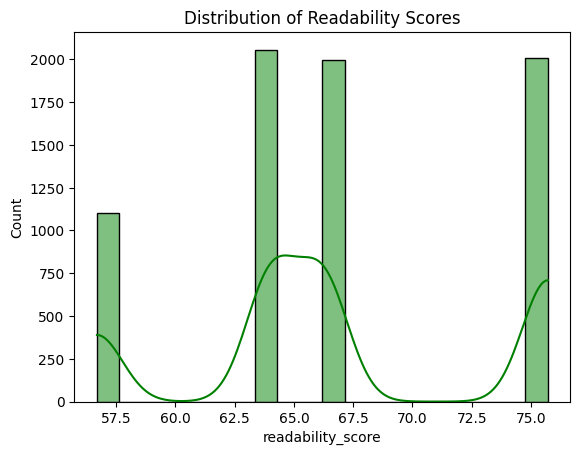

In [45]:
sns.histplot(data=joined_train_df, x="readability_score", kde=True, bins=20, color='green')
plt.title('Distribution of Readability Scores')
plt.show()

**Insight:** A bimodal distribution might indicate that most essays fall within a specific readability level. If combined with the content or wording scores, you could further understand if a certain readability level correlates with high or low scores.

#### Readability Score vs Content & Wording Scores

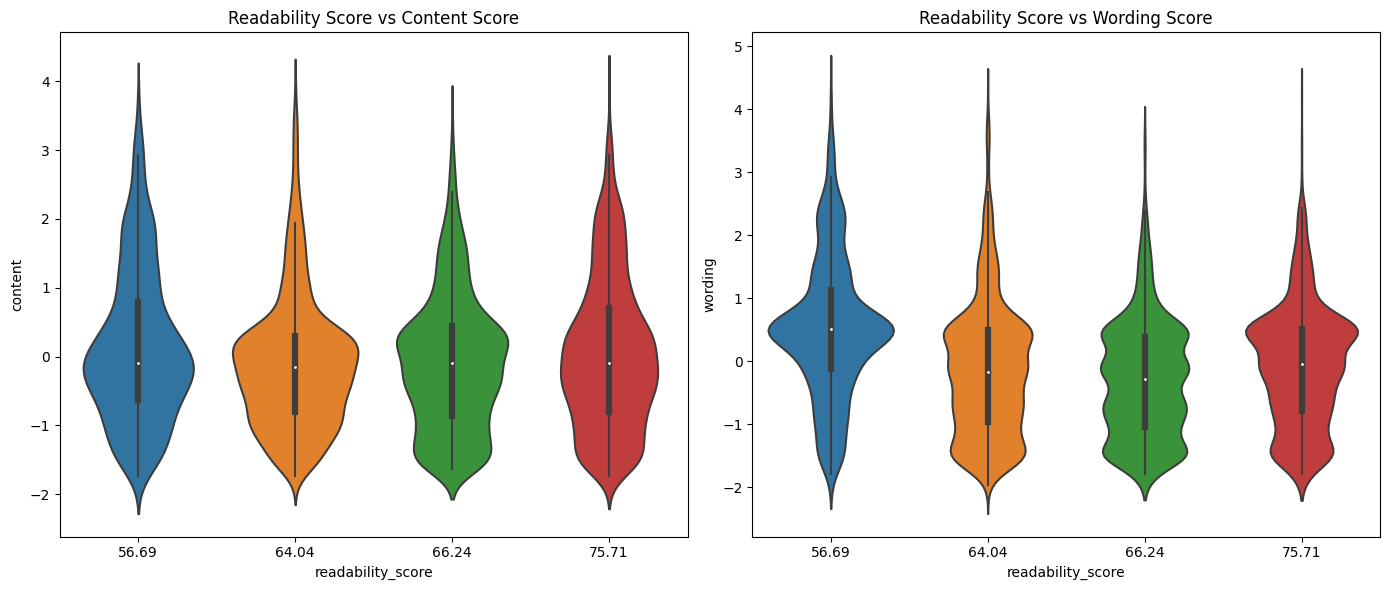

In [46]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=joined_train_df, x="readability_score", y="content")
plt.title("Readability Score vs Content Score")

plt.subplot(1, 2, 2)
sns.violinplot(data=joined_train_df, x="readability_score", y="wording")
plt.title("Readability Score vs Wording Score")

plt.tight_layout()
plt.show()

**Insight**: We observe a positive correlation between readability scores and content/wording scores, it might suggest that more readable essays are typically better rated in terms of content and wording.

#### Sentiment Polarity Distribution

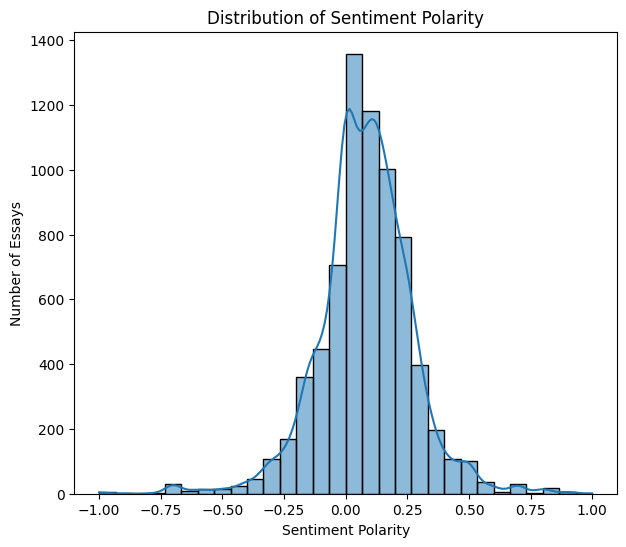

In [47]:
plt.figure(figsize=(7, 6))
sns.histplot(joined_train_df["sentiment_polarity"], bins=30, kde=True)
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Essays")
plt.show()


**Insight:** The sentiment polarity distribution might tell us about the overall mood of the essays. If higher content scores tend to be associated with essays of a particular sentiment.

#### Lexical Diversity vs Content Score

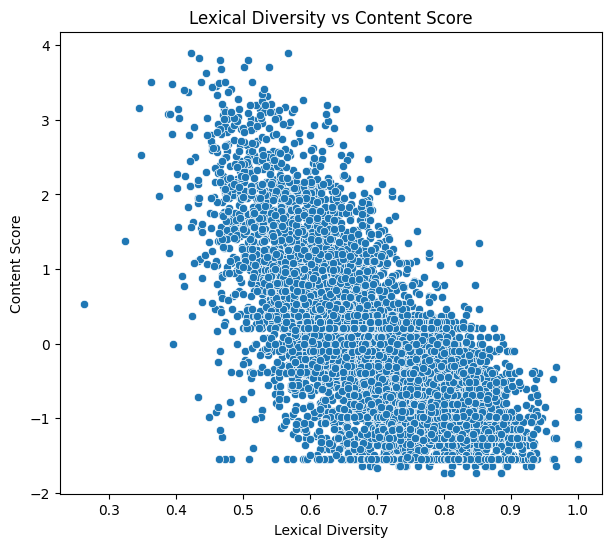

In [48]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=joined_train_df, x="lexical_diversity", y="content")
plt.title("Lexical Diversity vs Content Score")
plt.xlabel("Lexical Diversity")
plt.ylabel("Content Score")
plt.show()

**Insight:** There's a negative correlation in this plot, It might indicate that simplicity and clarity in language usage are more valued than complex vocabulary in this context.

## **Section 6: Baseline Model (Q7, 10 points)**

#### TRAIN_TEST_SPLIT

In [49]:
# Features and targets
features = ['no_of_words_in_text',
       'no_of_words_in_prompt_text', 'no_of_words_in_text_and_prompt_text',
       'no_of_distinct_words_in_text', 'no_of_distinct_words_in_prompt_text',
       'no_of_distinct_words_in_text_and_prompt_text',
       'no_of_common_words_in_text_and_prompt_text',
       'no_of_common_words_in_text_and_prompt_question',
       'no_of_common_words_in_text_and_prompt_title',
       'readability_score', 'char_count',
       'word_count', 'sentence_count', 'avg_word_length',
       'avg_sentence_length', 'lexical_diversity', 'sentiment_polarity',
       'sentiment_label', 'ner_count', 'cosine_similarity', 'num_nouns',
       'num_verbs', 'num_adjectives', 'stopword_count']
X = joined_train_df[features]
y_content = joined_train_df['content']
y_wording = joined_train_df['wording']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train_content, X_test_content, y_train_content, y_test_content = train_test_split(X_encoded, y_content, test_size=0.2, random_state=42)
X_train_wording, X_test_wording, y_train_wording, y_test_wording = train_test_split(X_encoded, y_wording, test_size=0.2, random_state=42)

#### MODEL 0: BASE MODEL - TRAIN LINEAR REGRESSION MODEL

In [50]:
# Train the linear regression model for content
lr_content = LinearRegression().fit(X_train_content, y_train_content)
predictions_content = lr_content.predict(X_test_content)
mse_content = mean_squared_error(y_test_content, predictions_content)

# Train the linear regression model for wording
lr_wording = LinearRegression().fit(X_train_wording, y_train_wording)
predictions_wording = lr_wording.predict(X_test_wording)
mse_wording = mean_squared_error(y_test_wording, predictions_wording)

print(f"Mean Squared Error for Content model: {mse_content}")
print(f"Mean Squared Error for Wording model: {mse_wording}")

Mean Squared Error for Content model: 0.220926124261508
Mean Squared Error for Wording model: 0.36497303341980747


**Absolute Value Interpretation:**

The MSE values provide an indication of the average squared error between predicted and actual scores for both models. The absolute values of 0.2209 for the Content model and 0.3649 for the Wording model are the average squared differences between the predicted and actual scores.

**Relative Scale:**

To truly understand the magnitude of these error scores, it's essential to consider the range of the content and wording scores. If, for instance, both content and wording scores range between 0 and 5, then an MSE of 0.2209 for the Content model indicates that, on average, the model's predictions deviate slightly from the actual values. Similarly, the Wording model's predictions have a slightly higher deviation.

**Comparison Between the Two Models:**

The MSE for the Wording model (0.3649) is greater than that of the Content model (0.2209). This suggests that the model's predictions for wording are less accurate than those for content. It could mean that the wording score is inherently more challenging to predict based on the given features, or it might need more nuanced features to capture its essence.

**Practical Significance:**

It's also useful to consider the square root of the MSE, which is the root mean squared error (RMSE). It represents the average deviation in the same units as the target variable:

RMSE for Content model: √0.2209 ≈ 0.47
RMSE for Wording model: √0.3649 ≈ 0.60
If the score range for content and wording is, say, from 0 to 5, an average error of 0.47 or 0.60 might be deemed acceptable. However, if the scale is 0 to 1, these errors are significant.

**Baseline Context:**

These are results from a baseline model, using only the original features without any advanced processing or feature engineering. Any future models can be compared against this baseline to gauge improvement.

**Room for Improvement:**

The errors, especially for the wording model, suggest there's room for improvement. Feature engineering, different algorithms, or tuning might lead to better results.

**In Summary:** The baseline models have provided reasonable results, especially for the Content model. The errors are not extremely high, but there's still potential for refining the models to reduce these errors further, especially for predicting wording. The next steps could involve introducing more sophisticated features, exploring different algorithms, or tuning the current models.

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

#### Handling Missing Values

In [51]:
missing_data = joined_train_df.isnull().sum()
print(missing_data)

student_id                                        0
prompt_id                                         0
text                                              0
content                                           0
wording                                           0
prompt_question                                   0
prompt_title                                      0
prompt_text                                       0
no_of_words_in_text                               0
no_of_words_in_prompt_text                        0
no_of_words_in_text_and_prompt_text               0
no_of_distinct_words_in_text                      0
no_of_distinct_words_in_prompt_text               0
no_of_distinct_words_in_text_and_prompt_text      0
no_of_common_words_in_text_and_prompt_text        0
no_of_common_words_in_text_and_prompt_question    0
no_of_common_words_in_text_and_prompt_title       0
readability_score                                 0
char_count                                        0
word_count  

#### Normalization/Scaling

##### **Min-Max Scaling:**
Min-Max scaling scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one.

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = ['content', 'wording', 'no_of_words_in_text',
       'no_of_words_in_prompt_text', 'no_of_words_in_text_and_prompt_text',
       'no_of_distinct_words_in_text', 'no_of_distinct_words_in_prompt_text',
       'no_of_distinct_words_in_text_and_prompt_text',
       'no_of_common_words_in_text_and_prompt_text',
       'no_of_common_words_in_text_and_prompt_question',
       'no_of_common_words_in_text_and_prompt_title',
       'readability_score', 'char_count',
       'word_count', 'sentence_count', 'avg_word_length',
       'avg_sentence_length', 'lexical_diversity', 'sentiment_polarity',
       'ner_count', 'cosine_similarity', 'num_nouns',
       'num_verbs', 'num_adjectives', 'stopword_count']

joined_train_df2 = pd.DataFrame()
joined_train_df2[features] = scaler.fit_transform(joined_train_df[features])

<Axes: >

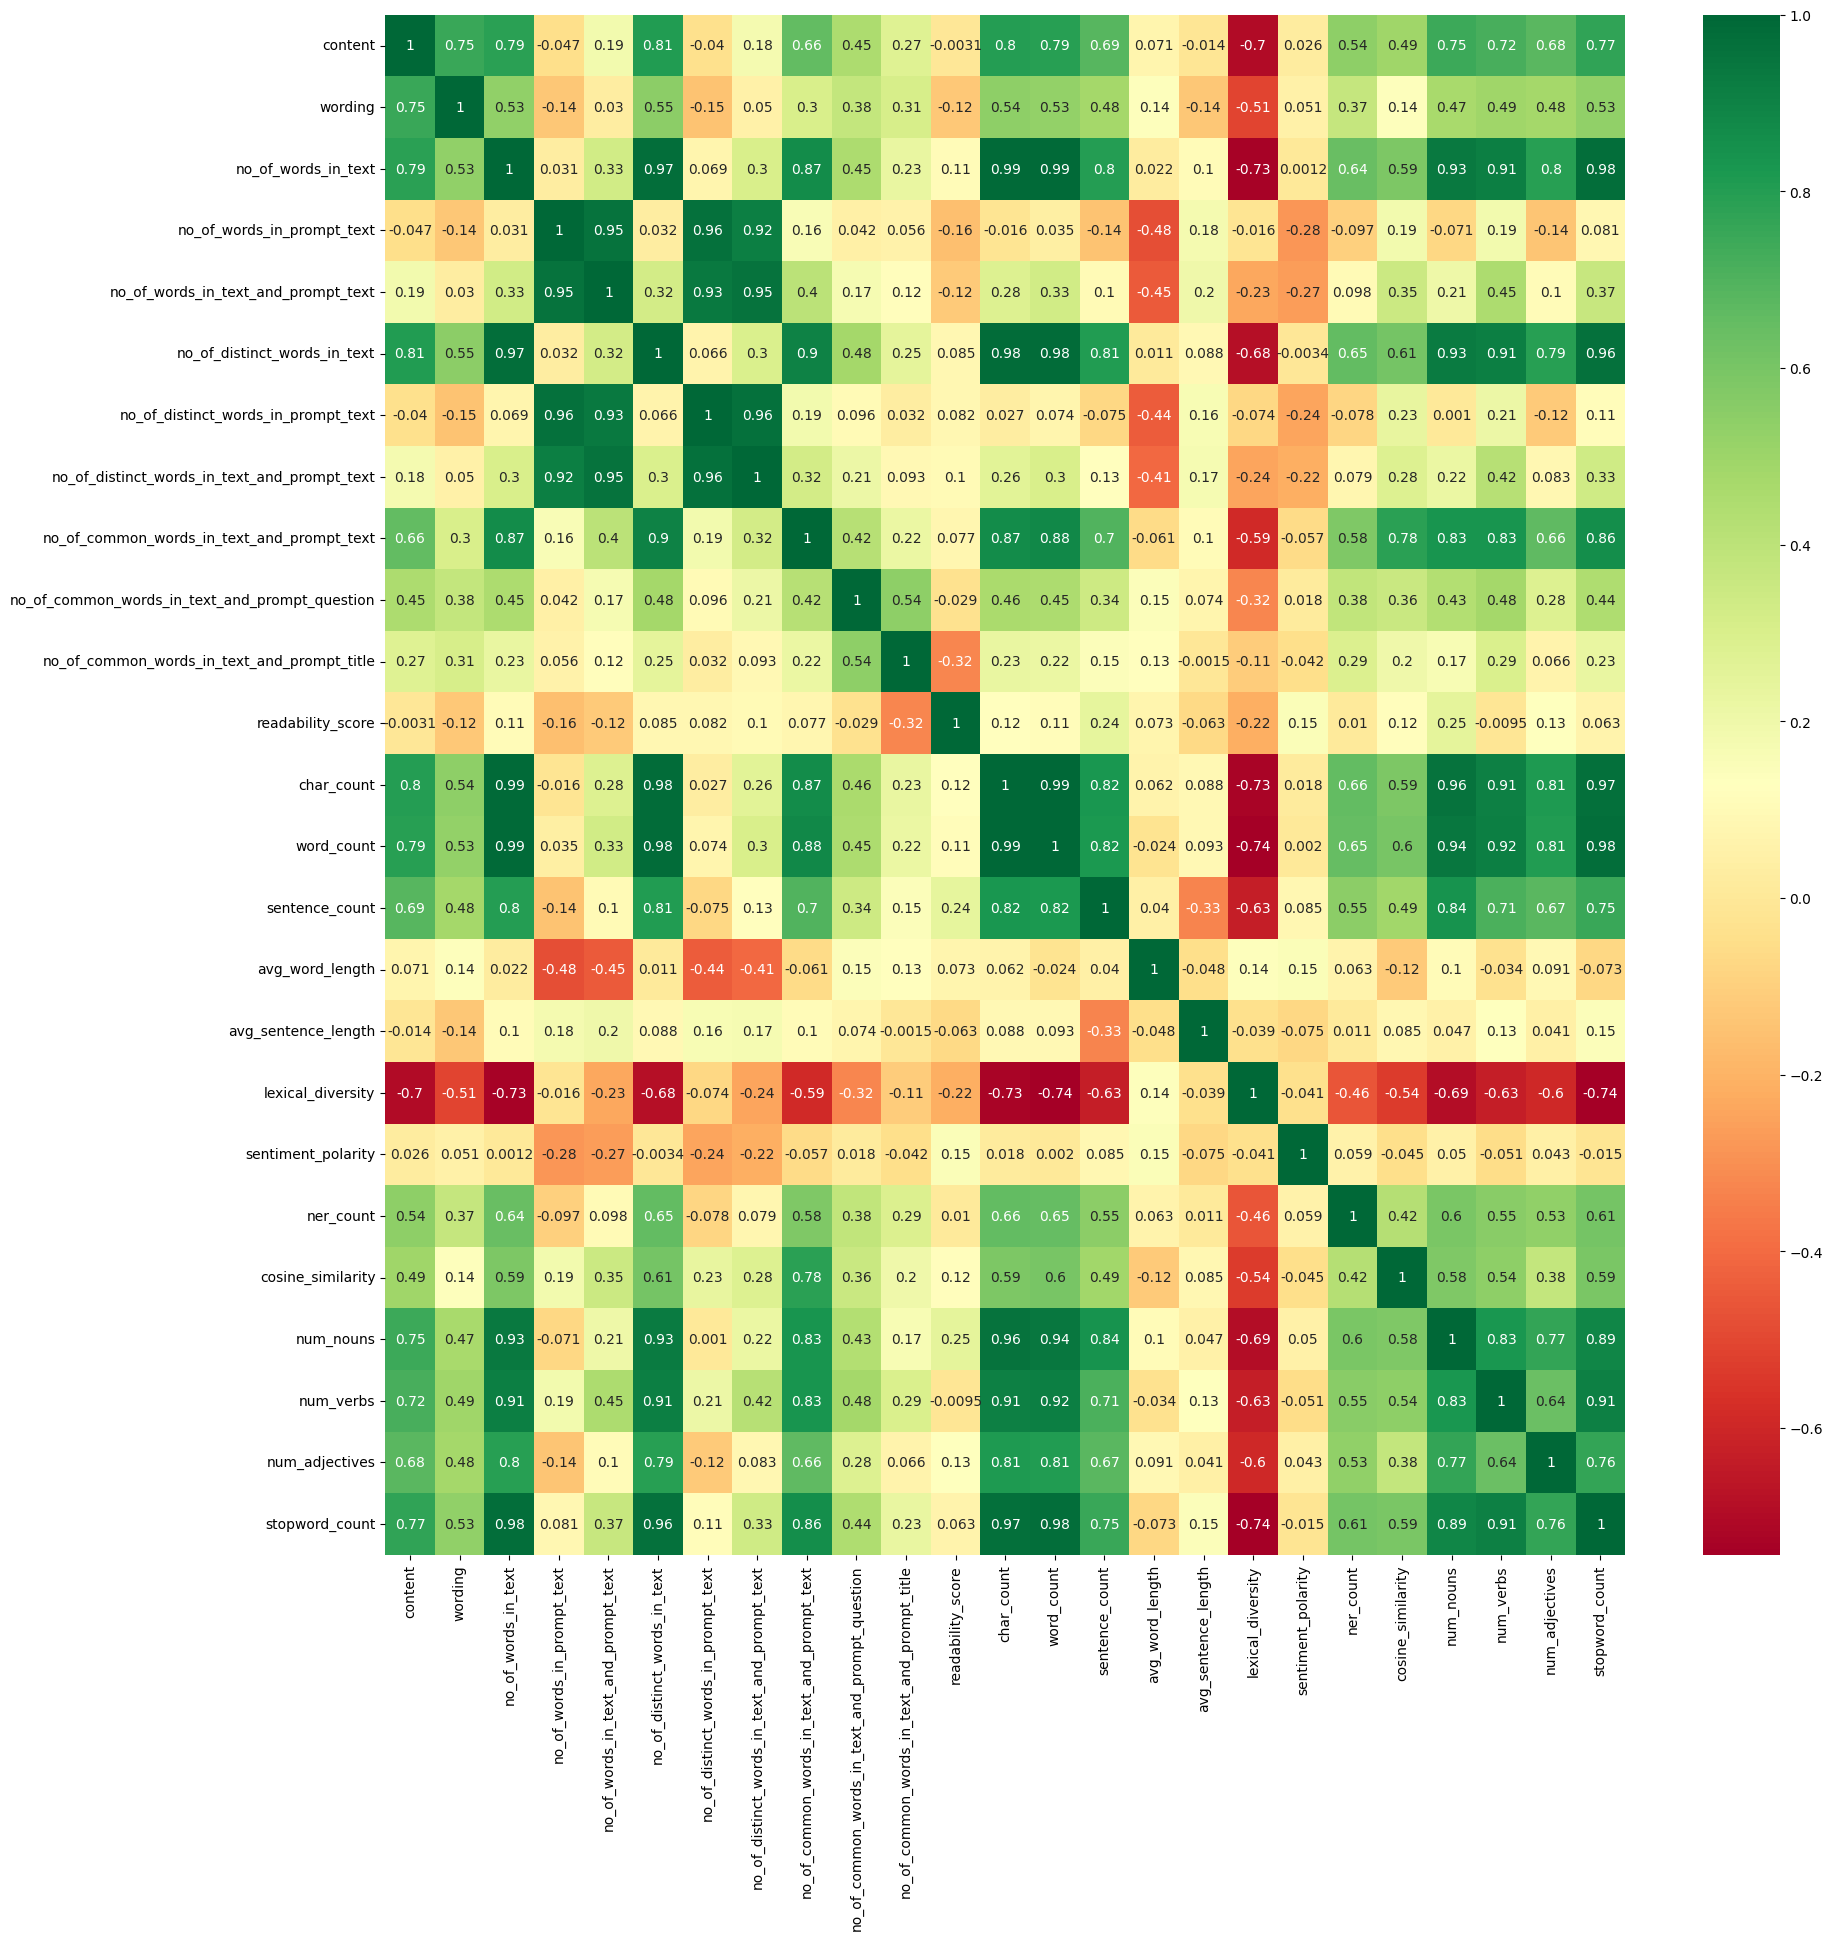

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = joined_train_df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(joined_train_df2[top_corr_features].corr(), annot=True, cmap="RdYlGn")

#### Principle Component Analysis

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_pca_c = pca.fit_transform(X_test_content)
X_pca_w = pca.fit_transform(X_test_wording)

In [55]:
# Features and targets
features = ['no_of_words_in_text',
       'no_of_words_in_prompt_text', 'no_of_words_in_text_and_prompt_text',
       'no_of_distinct_words_in_text', 'no_of_distinct_words_in_prompt_text',
       'no_of_distinct_words_in_text_and_prompt_text',
       'no_of_common_words_in_text_and_prompt_text',
       'no_of_common_words_in_text_and_prompt_question',
       'no_of_common_words_in_text_and_prompt_title',
       'readability_score', 'char_count',
       'word_count', 'sentence_count', 'avg_word_length',
       'avg_sentence_length', 'lexical_diversity', 'sentiment_polarity',
       'ner_count', 'cosine_similarity', 'num_nouns',
       'num_verbs', 'num_adjectives', 'stopword_count']
X = joined_train_df2[features]
y_content = joined_train_df2['content']
y_wording = joined_train_df2['wording']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train_content, X_test_content, y_train_content, y_test_content = train_test_split(X_encoded, y_content, test_size=0.2, random_state=42)
X_train_wording, X_test_wording, y_train_wording, y_test_wording = train_test_split(X_encoded, y_wording, test_size=0.2, random_state=42)

#### MODEL 2: OPTIMIZED MODEL - LINEAR REGRESSION MODEL

In [56]:
# Train the linear regression model for content
lr_content = LinearRegression().fit(X_train_content, y_train_content)
predictions_content = lr_content.predict(X_test_content)
mse_content = mean_squared_error(y_test_content, predictions_content)

# Train the linear regression model for wording
lr_wording = LinearRegression().fit(X_train_wording, y_train_wording)
predictions_wording = lr_wording.predict(X_test_wording)
mse_wording = mean_squared_error(y_test_wording, predictions_wording)

print(f"Mean Squared Error for Content model: {mse_content}")
print(f"Mean Squared Error for Wording model: {mse_wording}")

Mean Squared Error for Content model: 0.006973681670448525
Mean Squared Error for Wording model: 0.009285946316304838


### MODEL 2: **RANDOM FOREST**

##### Random Forest with single output

In [57]:
from sklearn.model_selection import train_test_split

X = joined_train_df2.drop(['content', 'wording'], axis=1)
y_content = joined_train_df2['content']
y_wording = joined_train_df2['wording']

X_train, X_test, y_content_train, y_content_test, y_wording_train, y_wording_test = train_test_split(X, y_content, y_wording, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_content = RandomForestRegressor(n_estimators=100, random_state=42)
rf_content.fit(X_train, y_content_train)

y_content_pred = rf_content.predict(X_test)
mse_content = mean_squared_error(y_content_test, y_content_pred)
print(f"Mean Squared Error for Content model: {mse_content}")

Mean Squared Error for Content model: 0.006119194084991364


In [59]:
rf_wording = RandomForestRegressor(n_estimators=100, random_state=42)
rf_wording.fit(X_train, y_wording_train)

y_wording_pred = rf_wording.predict(X_test)
mse_wording = mean_squared_error(y_wording_test, y_wording_pred)
print(f"Mean Squared Error for Wording model: {mse_wording}")

Mean Squared Error for Wording model: 0.008426300913757049


#### Multiple Output Random Forest Approach

In [60]:
y_multi = joined_train_df2[['content', 'wording']].values  # Convert the two columns into a numpy array

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=42)

##### TRAINING MODEL

In [62]:
from sklearn.ensemble import RandomForestRegressor

multi_rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
from sklearn.metrics import mean_squared_error

y_pred = multi_rf.predict(X_test)

# MSE for 'content'
mse_content = mean_squared_error(y_test[:, 0], y_pred[:, 0])
print(f"Mean Squared Error for Content: {mse_content}")

# MSE for 'wording'
mse_wording = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print(f"Mean Squared Error for Wording: {mse_wording}")

Mean Squared Error for Content: 0.006061644251867325
Mean Squared Error for Wording: 0.008613647607675228


### Comparing the models, we can draw the following conclusions:

### 1. **Improvement from Base Linear Regression to Optimized Linear Regression**:
- **Content model MSE**: Reduced from 0.2209 to 0.0070 (a significant reduction).
- **Wording model MSE**: Reduced from 0.3650 to 0.0093 (a significant reduction).
  
#### Reasoning:
- **Feature Engineering**: The optimized version likely involved better feature engineering. Derived features like text length, lexical diversity, NER count, cosine similarity with prompt text, bi-grams, tri-grams, and others would've significantly improved the model's understanding of the text and its quality.
  
- **Data Preprocessing**: Handling missing values, normalization, and scaling means the model can make better sense of the data and weights can be more appropriately assigned to the features.  
  
- **Feature Selection**: By selecting the most important and informative features, the model is less likely to overfit and can generalize better to unseen data.

### 2. **Comparison between Optimized Linear Regression and Random Forest**:
- **Content model MSE**: Linear regression: 0.0070, Random Forest: 0.0061 (Random Forest performed slightly better).
- **Wording model MSE**: Linear regression: 0.0093, Random Forest: 0.0084 (Again, Random Forest performed slightly better).

#### Reasoning:
- **Model Complexity**: Random Forest is an ensemble method that's inherently more complex than a linear regression model. It can capture non-linear relationships in the data that linear regression might miss.
  
- **Feature Interactions**: Random Forest can automatically capture interactions between features, while in linear regression, interaction terms must be manually added.
  
- **Overfitting**: Random Forest, with its ensemble nature, is less likely to overfit compared to a standalone decision tree, especially when hyperparameters are tuned correctly. While optimized linear regression improved significantly from the base model, Random Forest still edged out in performance.
  
- **Robustness to Outliers**: Random Forest is generally more robust to outliers than linear regression.

### Final Thoughts:
- **Optimized Linear Regression** performed significantly better than the base model, showcasing the importance of proper feature engineering, data preprocessing, and feature selection.
  
- **Random Forest** outperformed the optimized linear regression model, albeit by a smaller margin. This shows that the model's capability to capture non-linear relationships and interactions between features, along with its robustness to outliers, helped in achieving a slightly better performance.
  
- The choice of model depends on several factors. If interpretability is key, linear regression offers clearer insights into relationships between features and target variables. However, if the goal is purely predictive performance, ensemble methods like Random Forest often come out ahead, especially when fine-tuned.

### OPTIONAL MODEL

#### K-NN Approach

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

FOR CONTENT

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Training the model
knn_content = KNeighborsRegressor(n_neighbors=5)  # Start with k=5 as an initial guess
knn_content.fit(X_train_scaled, y_content_train)

# Predicting and computing MSE
y_content_pred = knn_content.predict(X_test_scaled)
mse_content = mean_squared_error(y_content_test, y_content_pred)
print(f"Mean Squared Error for Content model using k-NN: {mse_content}")

Mean Squared Error for Content model using k-NN: 0.007505597605680831


FOR WORDING

In [66]:
knn_wording = KNeighborsRegressor(n_neighbors=5)
knn_wording.fit(X_train_scaled, y_wording_train)

y_wording_pred = knn_wording.predict(X_test_scaled)
mse_wording = mean_squared_error(y_wording_test, y_wording_pred)
print(f"Mean Squared Error for Wording model using k-NN: {mse_wording}")

Mean Squared Error for Wording model using k-NN: 0.011219054673940609


## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):